# MLP data augmentation - 4 layers - batch normalisation

Multilayer Perceptron (MLP) model using 4 layers, data augmentation and Batch Normalization applied after each linear layer for image classification using the CIFAR-100 dataset.


# Import library

The required libraries are imported, including Torch and TorchVision for model creation and data handling, Matplotlib for visualization, and torch.nn modules for building the neural network.

In [3]:
import torch
from torch.utils.data import DataLoader
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F


# Data augmentation

Hyperparameters such as input size, hidden layer size, output size, learning rate, number of epochs, and batch size are defined.

Data transformations are defined using the transforms.Compose class. For training data, transformations include random horizontal flipping and random cropping. For test data, only the transformation to a tensor is applied.

In [4]:
# Hyperparameters
input_size = 32 * 32 * 3
hidden_size = 256  # Increase the hidden layer size
output_size = 100
learning_rate = 0.001
num_epochs = 40
batch_size = 64

# Define data augmentation transformations
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
])

# Data loading

The CIFAR-100 training and test datasets are loaded using the defined transformations.
Data loaders (DataLoader) are created for both training and testing datasets. They handle batch loading of data and optional shuffling.


In [5]:
# Load datasets with data augmentation for training and normal transform for testing
train_dataset = datasets.CIFAR100(
    root='data',
    train=True,
    transform=train_transform,
    download=True
)
test_dataset = datasets.CIFAR100(
    root='data',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)




Files already downloaded and verified
Files already downloaded and verified


# DeepMLP definition

A deep MLP model is defined using the nn.Module class. The model consists of multiple linear layers with Batch Normalization applied after each linear layer. This promotes stable training by normalizing the activations within each layer.

The forward method of the model is defined. It takes the input tensor, flattens it, applies the linear layers with Batch Normalization, and returns the output logits.

In [6]:
# MLP definition with Batch Normalization added after each linear layer
class DeepMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DeepMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)  # Batch Normalization after the first linear layer
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)  # Batch Normalization after the second linear layer
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.bn3 = nn.BatchNorm1d(hidden_size)  # Batch Normalization after the third linear layer
        self.fc4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.relu(self.bn2(self.fc2(x)))
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.fc4(x)
        return x

# Create the deep model
deep_model = DeepMLP(input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(deep_model.parameters(), lr=learning_rate)


# Training and evaluation

The train function takes the model, data loader, loss function, and optimizer as input. It performs a forward and backward pass, calculates the loss, and updates the model's weights. It also calculates the training accuracy.

The evaluate function evaluates the model's performance on the test data. It calculates the loss, accuracy, and average loss for the entire evaluation set.

The model is trained using a loop that iterates through the specified number of epochs. In each epoch, the model is trained using the train function, and then its performance is evaluated using the evaluate function on the test data.

In [7]:
# Training function
def train(model, dataloader, criterion, optimizer):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    accuracy = 100.0 * correct / total
    avg_loss = total_loss / len(dataloader)
    return avg_loss, accuracy

# Evaluation function
def evaluate(model, dataloader, criterion):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100.0 * correct / total
    avg_loss = total_loss / len(dataloader)
    return avg_loss, accuracy

# Training of the deep model
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    train_loss, train_accuracy = train(deep_model, train_loader, criterion, optimizer)
    test_loss, test_accuracy = evaluate(deep_model, test_loader, criterion)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')



Epoch [1/40], Train Loss: 3.8894, Train Accuracy: 10.53%, Test Loss: 3.6194, Test Accuracy: 14.01%
Epoch [2/40], Train Loss: 3.5634, Train Accuracy: 15.42%, Test Loss: 3.4849, Test Accuracy: 16.96%
Epoch [3/40], Train Loss: 3.4289, Train Accuracy: 17.67%, Test Loss: 3.3408, Test Accuracy: 19.53%
Epoch [4/40], Train Loss: 3.3362, Train Accuracy: 19.47%, Test Loss: 3.2616, Test Accuracy: 20.77%
Epoch [5/40], Train Loss: 3.2621, Train Accuracy: 20.81%, Test Loss: 3.3570, Test Accuracy: 20.06%
Epoch [6/40], Train Loss: 3.2031, Train Accuracy: 21.85%, Test Loss: 3.1867, Test Accuracy: 22.38%
Epoch [7/40], Train Loss: 3.1485, Train Accuracy: 22.85%, Test Loss: 3.1389, Test Accuracy: 23.43%
Epoch [8/40], Train Loss: 3.1016, Train Accuracy: 23.70%, Test Loss: 3.1032, Test Accuracy: 24.46%
Epoch [9/40], Train Loss: 3.0634, Train Accuracy: 24.31%, Test Loss: 3.0674, Test Accuracy: 24.71%
Epoch [10/40], Train Loss: 3.0279, Train Accuracy: 25.17%, Test Loss: 3.0689, Test Accuracy: 24.97%
Epoch [11

# Plotting performance curves

After training, the code uses Matplotlib to visualize the training and testing losses and accuracies over epochs.

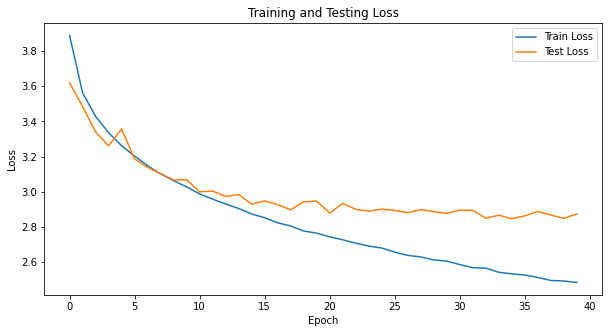

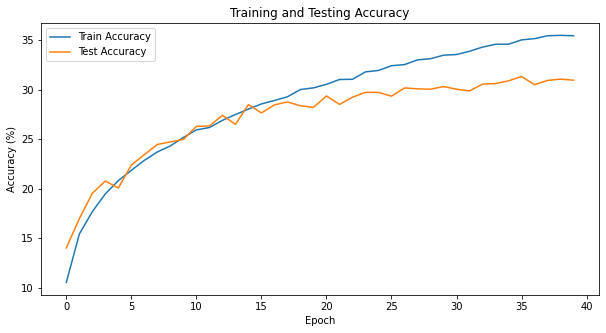

In [8]:
# Plotting performance curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Testing Loss')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Testing Accuracy')
plt.show()





# More explanations:

train and evaluate function, are responsible for training and evaluating the deep MLP model, respectively. They both compute loss, accuracy, and update model parameters as necessary.

# train Function

This function performs one epoch of training on the given data loader.

The function does the following:
Sets the model in training mode using model.train().
Initializes counters for total loss, correct predictions, and total samples.

Iterates through the data loader batches:
- Clears gradients using optimizer.zero_grad().
- Performs a forward pass through the model to obtain predictions.
- Calculates the loss using the provided loss function.
- Backpropagates the loss to compute gradients for model parameters.
- Updates model parameters using the optimizer.
- Records the loss and calculates the number of correct predictions.
- Calculates the accuracy and average loss for the epoch.
- Returns the average loss and accuracy.

# evaluate Function

This function evaluates the model on the given data loader for testing.
model

The function does the following:
Sets the model in evaluation mode using model.eval().
Initializes counters for total loss, correct predictions, and total samples.
Uses the torch.no_grad() context to disable gradient calculation during evaluation.

Iterates through the data loader batches:
- Performs a forward pass through the model to obtain predictions.
- Calculates the loss using the provided loss function.
- Records the loss and calculates the number of correct predictions.
- Calculates the accuracy and average loss for the evaluation.
- Returns the average loss and accuracy.

# Result:

This model performed much better than the simple perceptron with 35% (train) vs 30% (test) witch confirm that by adding more layers, data augmentation and batch normalization imroved the model.
Besides the loss curve decreased with 2,5% (train) vs 2,8% (test). However, this model did not get convergence and could be probably improved using CNN or more complex CNN.